#Install important libraries

In [ ]:
!pip install chembl-webresource-client
!pip install rdkit-pypi
!pip install mordred

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 683.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.5 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176717 sha256=6f08be4b69939a7c355ddd76baee6e9fcafdbb020dfeab42c9c44e75bbdb050a
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3


# Import Libraries

In [ ]:
#Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client
import numpy as np
import rdkit
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from mordred import Calculator, descriptors

# Search for Target protein
The target protein was Cyclin-dependent kinase 1, from homo sapiens organism, a single protein that has 3165 compounds.

In [ ]:
#Target search for CDK1 protein
my_target = new_client.target
my_target_query = my_target.search('cdk1')
my_targets = pd.DataFrame.from_dict(my_target_query)
my_targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P00546', 'xref_name': None, 'xre...",Saccharomyces cerevisiae S288c,Cell division control protein 28,16.0,False,CHEMBL5213,"[{'accession': 'P00546', 'component_descriptio...",SINGLE PROTEIN,559292
1,[],Homo sapiens,CDK4/CDK1,16.0,False,CHEMBL4523963,"[{'accession': 'P06493', 'component_descriptio...",SELECTIVITY GROUP,9606
2,"[{'xref_id': 'Cyclin-dependent_kinase_1', 'xre...",Homo sapiens,Cyclin-dependent kinase 1,15.0,False,CHEMBL308,"[{'accession': 'P06493', 'component_descriptio...",SINGLE PROTEIN,9606
3,"[{'xref_id': 'P11440', 'xref_name': None, 'xre...",Mus musculus,Cyclin-dependent kinase 1,15.0,False,CHEMBL4084,"[{'accession': 'P11440', 'component_descriptio...",SINGLE PROTEIN,10090
4,[],Homo sapiens,Cyclin-dependent kinase 1/cyclin B1,14.0,False,CHEMBL1907602,"[{'accession': 'P06493', 'component_descriptio...",PROTEIN COMPLEX,9606
5,[],Homo sapiens,CDK1/Cyclin A,14.0,False,CHEMBL3038467,"[{'accession': 'P06493', 'component_descriptio...",PROTEIN COMPLEX,9606
6,[],Homo sapiens,CDK1/Cyclin E,14.0,False,CHEMBL3038468,"[{'accession': 'P06493', 'component_descriptio...",PROTEIN COMPLEX,9606
7,[],Homo sapiens,Cyclin-dependent kinase 1/ G1/S-specific cycli...,14.0,False,CHEMBL4296065,"[{'accession': 'P06493', 'component_descriptio...",PROTEIN COMPLEX,9606
8,[],Homo sapiens,Cyclin-dependent kinase 1/Cyclin A1,14.0,False,CHEMBL4296066,"[{'accession': 'P06493', 'component_descriptio...",PROTEIN COMPLEX,9606
9,[],Homo sapiens,Protein cereblon/Cyclin-dependent kinase 1,14.0,False,CHEMBL4523683,"[{'accession': 'P06493', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606


# Select and retrieve bioactivity data for target

In [ ]:
#Selecting the specific target protein
selected_target = my_targets.target_chembl_id[2]
selected_target

'CHEMBL308'

In [ ]:
#Retrieving bioactivity data for Cyclin-dependent kinase 1 (CHEMBL308) that are reported as pChEMBL values
activity = new_client.activity
data = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

The IC50 value for CHEMBL308 (Cyclin-dependent kinase 1) is 1752

In [ ]:
df = pd.DataFrame.from_dict(data)

In [ ]:
df.head(5)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,72612,[],CHEMBL662511,In vitro inhibitory activity against cyclin-de...,B,None,None,BAO_0000190,...,Homo sapiens,Cyclin-dependent kinase 1,9606,None,None,IC50,uM,UO_0000065,None,0.9
1,None,None,72615,[],CHEMBL662511,In vitro inhibitory activity against cyclin-de...,B,None,None,BAO_0000190,...,Homo sapiens,Cyclin-dependent kinase 1,9606,None,None,IC50,uM,UO_0000065,None,150.0
2,None,None,72620,[],CHEMBL662511,In vitro inhibitory activity against cyclin-de...,B,None,None,BAO_0000190,...,Homo sapiens,Cyclin-dependent kinase 1,9606,None,None,IC50,uM,UO_0000065,None,70.0
3,None,None,73687,[],CHEMBL662511,In vitro inhibitory activity against cyclin-de...,B,None,None,BAO_0000190,...,Homo sapiens,Cyclin-dependent kinase 1,9606,None,None,IC50,uM,UO_0000065,None,0.4
4,None,None,74688,[],CHEMBL662511,In vitro inhibitory activity against cyclin-de...,B,None,None,BAO_0000190,...,Homo sapiens,Cyclin-dependent kinase 1,9606,None,None,IC50,uM,UO_0000065,None,0.3


# Handling missing data

In [ ]:
#Handling missing data
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

<ipython-input-8-67cfb582c1f6>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,72612,[],CHEMBL662511,In vitro inhibitory activity against cyclin-de...,B,None,None,BAO_0000190,...,Homo sapiens,Cyclin-dependent kinase 1,9606,None,None,IC50,uM,UO_0000065,None,0.9
1,None,None,72615,[],CHEMBL662511,In vitro inhibitory activity against cyclin-de...,B,None,None,BAO_0000190,...,Homo sapiens,Cyclin-dependent kinase 1,9606,None,None,IC50,uM,UO_0000065,None,150.0
2,None,None,72620,[],CHEMBL662511,In vitro inhibitory activity against cyclin-de...,B,None,None,BAO_0000190,...,Homo sapiens,Cyclin-dependent kinase 1,9606,None,None,IC50,uM,UO_0000065,None,70.0
3,None,None,73687,[],CHEMBL662511,In vitro inhibitory activity against cyclin-de...,B,None,None,BAO_0000190,...,Homo sapiens,Cyclin-dependent kinase 1,9606,None,None,IC50,uM,UO_0000065,None,0.4
4,None,None,74688,[],CHEMBL662511,In vitro inhibitory activity against cyclin-de...,B,None,None,BAO_0000190,...,Homo sapiens,Cyclin-dependent kinase 1,9606,None,None,IC50,uM,UO_0000065,None,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25062182,[],CHEMBL5250743,Inhibition of CDK1 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cyclin-dependent kinase 1,9606,None,None,IC50,nM,UO_0000065,None,3.0
1748,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25073371,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5253630,Inhibition of human CDK1 using Biotinaminohexy...,B,None,None,BAO_0000190,...,Homo sapiens,Cyclin-dependent kinase 1,9606,None,None,IC50,nM,UO_0000065,None,0.54
1749,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25073414,[],CHEMBL5253656,Inhibition of CDK1 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cyclin-dependent kinase 1,9606,None,None,IC50,nM,UO_0000065,None,3.0
1750,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25073415,[],CHEMBL5253656,Inhibition of CDK1 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cyclin-dependent kinase 1,9606,None,None,IC50,nM,UO_0000065,None,30.0


In [ ]:
len(df2.canonical_smiles.unique())

1506

In [ ]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,72612,[],CHEMBL662511,In vitro inhibitory activity against cyclin-de...,B,None,None,BAO_0000190,...,Homo sapiens,Cyclin-dependent kinase 1,9606,None,None,IC50,uM,UO_0000065,None,0.9
1,None,None,72615,[],CHEMBL662511,In vitro inhibitory activity against cyclin-de...,B,None,None,BAO_0000190,...,Homo sapiens,Cyclin-dependent kinase 1,9606,None,None,IC50,uM,UO_0000065,None,150.0
2,None,None,72620,[],CHEMBL662511,In vitro inhibitory activity against cyclin-de...,B,None,None,BAO_0000190,...,Homo sapiens,Cyclin-dependent kinase 1,9606,None,None,IC50,uM,UO_0000065,None,70.0
3,None,None,73687,[],CHEMBL662511,In vitro inhibitory activity against cyclin-de...,B,None,None,BAO_0000190,...,Homo sapiens,Cyclin-dependent kinase 1,9606,None,None,IC50,uM,UO_0000065,None,0.4
4,None,None,74688,[],CHEMBL662511,In vitro inhibitory activity against cyclin-de...,B,None,None,BAO_0000190,...,Homo sapiens,Cyclin-dependent kinase 1,9606,None,None,IC50,uM,UO_0000065,None,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25007730,[],CHEMBL5235533,Inhibition of CDK1 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cyclin-dependent kinase 1,9606,None,None,IC50,uM,UO_0000065,None,17.0
1741,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25016127,[],CHEMBL5238228,Inhibition of CDK1 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cyclin-dependent kinase 1,9606,None,None,IC50,nM,UO_0000065,None,3375.0
1743,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25037071,[],CHEMBL5243643,Inhibition of CDK1 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cyclin-dependent kinase 1,9606,None,None,IC50,nM,UO_0000065,None,161.2
1747,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25062182,[],CHEMBL5250743,Inhibition of CDK1 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cyclin-dependent kinase 1,9606,None,None,IC50,nM,UO_0000065,None,3.0


# Data pre-processing of the bioactivity data

In [ ]:
#print the entire column title
columns_list = df2_nr.columns.tolist()

print(columns_list)

['action_type', 'activity_comment', 'activity_id', 'activity_properties', 'assay_chembl_id', 'assay_description', 'assay_type', 'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint', 'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment', 'data_validity_description', 'document_chembl_id', 'document_journal', 'document_year', 'ligand_efficiency', 'molecule_chembl_id', 'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value', 'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id', 'standard_flag', 'standard_relation', 'standard_text_value', 'standard_type', 'standard_units', 'standard_upper_value', 'standard_value', 'target_chembl_id', 'target_organism', 'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type', 'units', 'uo_units', 'upper_value', 'value']


In [ ]:
#Combining 3 columns (molecule_chembl_id, canonical_smiles, standard_value)
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL95827,COc1ccc2[nH]c3c(c2c1)CC(=O)Nc1ccccc1-3,900.0
1,CHEMBL420455,CC(C)(C)OC(=O)C1C(=O)N(C(=O)OC(C)(C)C)c2ccccc2...,150000.0
2,CHEMBL100312,CC(C)(C)OC(=O)n1c2c(c3cc(Br)ccc31)CC(=O)Nc1ccc...,70000.0
3,CHEMBL296586,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2ccccc2N1,400.0
4,CHEMBL98360,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2cc(Br)ccc2N1,300.0
...,...,...,...
1740,CHEMBL269538,COc1ccc2c(c1)[nH]c1c(C)nccc12,17000.0
1741,CHEMBL5288241,C=CC(=O)Nc1ccc(C(=O)Nc2n[nH]c3ccc(-c4cncc(NC[C...,3375.0
1743,CHEMBL5286623,COc1ccc(Nc2nn3c(-c4ccccc4)cc(-c4ccccc4)nc3c2C(...,161.2
1747,CHEMBL5266005,CCc1cnn2c(NCc3ccc[n+]([O-])c3)cc(N3CCCC[C@@H]3...,3.0


# Labelling compounds as either active, inactive or intermediate



In [ ]:
#Label compounds as either active, inactive or intermediate.
#less than 1000 nM will be considered to be active
#greater than 10000 nM will be considered to be inactive
#in between 1,000 and 10,000 nM will be considered to be intermediate.

bioactivity_threshold = []
for i in df3.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [ ]:
df3.head()

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL95827,COc1ccc2[nH]c3c(c2c1)CC(=O)Nc1ccccc1-3,900.0
1,CHEMBL420455,CC(C)(C)OC(=O)C1C(=O)N(C(=O)OC(C)(C)C)c2ccccc2...,150000.0
2,CHEMBL100312,CC(C)(C)OC(=O)n1c2c(c3cc(Br)ccc31)CC(=O)Nc1ccc...,70000.0
3,CHEMBL296586,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2ccccc2N1,400.0
4,CHEMBL98360,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2cc(Br)ccc2N1,300.0


In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4.head()

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL95827,COc1ccc2[nH]c3c(c2c1)CC(=O)Nc1ccccc1-3,900.0,active
1,CHEMBL420455,CC(C)(C)OC(=O)C1C(=O)N(C(=O)OC(C)(C)C)c2ccccc2...,150000.0,inactive
2,CHEMBL100312,CC(C)(C)OC(=O)n1c2c(c3cc(Br)ccc31)CC(=O)Nc1ccc...,70000.0,inactive
3,CHEMBL296586,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2ccccc2N1,400.0,active
4,CHEMBL98360,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2cc(Br)ccc2N1,300.0,active


# Calculate Lipinski descriptors

A Pfizer scientist, Christopher Lipinski developed a set of guidelines for determining whether a molecule is druglike or not. This drug-likeness depends on the Absorption, Distribution, Metabolism, and Excretion (ADME), sometimes referred to as the pharmacokinetic profile. Lipinski evaluated all orally active drugs approved by the FDA to develop the Rule-of-Five, often known as Lipinski's Rule.

The Lipinski's Rule states that:
*   Molecular weight < 500 Dalton
*   Octanol-water partition coefficient (LogP) < 5
*   Hydrogen bond donors < 5
*   Hydrogen bond acceptors < 10


In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import pandas as pd
import numpy as np

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        # Check if elem is a valid SMILES string before converting
        if isinstance(elem, str):
            mol=Chem.MolFromSmiles(elem)
            moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
# Example (assuming df4 is your DataFrame)
df_lipinski = lipinski(df4.canonical_smiles)

In [ ]:
df_lipinski.head()

,MW,LogP,NumHDonors,NumHAcceptors
0,278.311,3.3381,2.0,2.0
1,627.532,7.5610,0.0,8.0
2,427.298,5.3486,1.0,4.0
3,327.181,4.0920,2.0,1.0
4,406.077,4.8545,2.0,1.0


In [ ]:
df4.head()

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL95827,COc1ccc2[nH]c3c(c2c1)CC(=O)Nc1ccccc1-3,900.0,active
1,CHEMBL420455,CC(C)(C)OC(=O)C1C(=O)N(C(=O)OC(C)(C)C)c2ccccc2...,150000.0,inactive
2,CHEMBL100312,CC(C)(C)OC(=O)n1c2c(c3cc(Br)ccc31)CC(=O)Nc1ccc...,70000.0,inactive
3,CHEMBL296586,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2ccccc2N1,400.0,active
4,CHEMBL98360,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2cc(Br)ccc2N1,300.0,active


In [ ]:
df_combined = pd.concat([df4,df_lipinski], axis=1)

In [ ]:
df_combined.head()

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL95827,COc1ccc2[nH]c3c(c2c1)CC(=O)Nc1ccccc1-3,900.0,active,278.311,3.3381,2.0,2.0
1,CHEMBL420455,CC(C)(C)OC(=O)C1C(=O)N(C(=O)OC(C)(C)C)c2ccccc2...,150000.0,inactive,627.532,7.5610,0.0,8.0
2,CHEMBL100312,CC(C)(C)OC(=O)n1c2c(c3cc(Br)ccc31)CC(=O)Nc1ccc...,70000.0,inactive,427.298,5.3486,1.0,4.0
3,CHEMBL296586,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2ccccc2N1,400.0,active,327.181,4.0920,2.0,1.0
4,CHEMBL98360,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2cc(Br)ccc2N1,300.0,active,406.077,4.8545,2.0,1.0


In [ ]:
df_combined.standard_value.describe()

,standard_value
count,1506
unique,465
top,15000.0
freq,200


## Convert IC50 to pIC50

To allow IC50 data to be more uniformly distributed, IC50 would be converted to the negative logarithmic scale which is -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:
*   Take the IC50 values from the standard_value column and convert it from nM to M by multiplying the value by 10 −9
*   Take the molar value and apply -log10
*   Delete the standard_value column and create a new pIC50 column




In [ ]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value']:
        try: # this will try to convert i to a float
            i = float(i)
        except ValueError: # if i is not a number, set molar to 0
            molar = 0
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value', axis = 1)

    return x
#Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative

In [ ]:
df_final = pIC50(df_combined)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL95827,COc1ccc2[nH]c3c(c2c1)CC(=O)Nc1ccccc1-3,active,278.311,3.3381,2.0,2.0,6.045757
1,CHEMBL420455,CC(C)(C)OC(=O)C1C(=O)N(C(=O)OC(C)(C)C)c2ccccc2...,inactive,627.532,7.5610,0.0,8.0,3.823909
2,CHEMBL100312,CC(C)(C)OC(=O)n1c2c(c3cc(Br)ccc31)CC(=O)Nc1ccc...,inactive,427.298,5.3486,1.0,4.0,4.154902
3,CHEMBL296586,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2ccccc2N1,active,327.181,4.0920,2.0,1.0,6.397940
4,CHEMBL98360,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2cc(Br)ccc2N1,active,406.077,4.8545,2.0,1.0,6.522879
...,...,...,...,...,...,...,...,...
1455,NaN,NaN,active,429.952,3.8142,2.0,5.0,NaN
1457,NaN,NaN,active,467.516,5.2492,2.0,4.0,NaN
1463,NaN,NaN,active,512.441,5.7665,1.0,7.0,NaN
1464,NaN,NaN,active,402.454,2.3537,0.0,5.0,NaN


In [ ]:
df_final.pIC50.describe()

,pIC50
count,1506.000000
mean,5.754436
std,1.408786
min,0.366532
25%,4.823909
50%,5.698970
75%,6.823909
max,10.000000


## Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0, 0.5, 'Frequency')

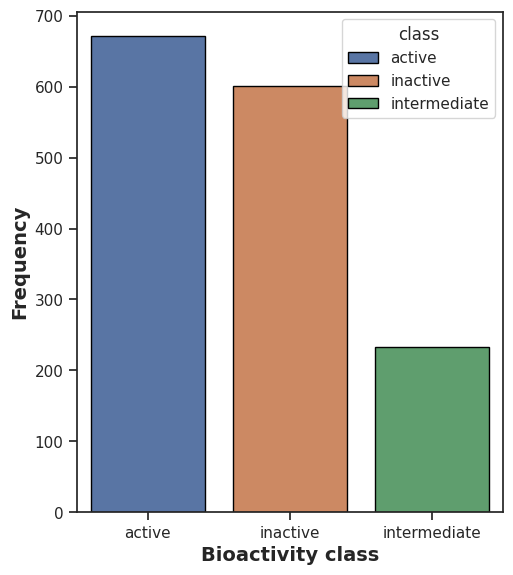

In [ ]:
plt.figure(figsize=(5.5, 6.5))

sns.countplot(x='class', data=df_final, edgecolor='black', hue = 'class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

#plt.savefig('pfht1_plot_bioactivity_class.pdf')

**Scatter plot of Molecular Weight (MW) versus Octanol/water partition coefficient (LogP)**

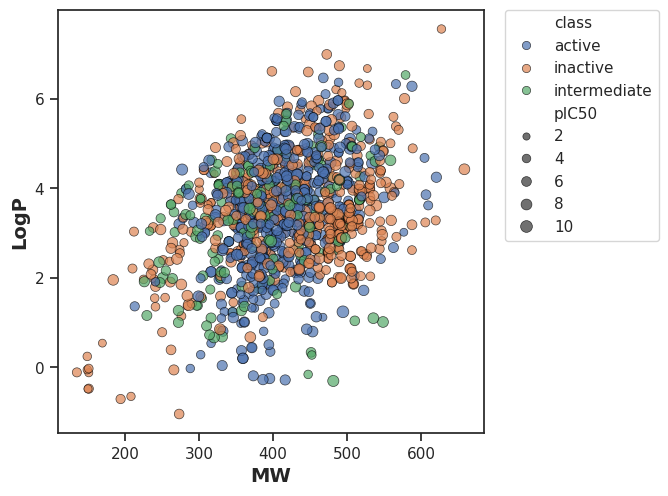

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_final, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
#plt.savefig('plot_MW_vs_LogP.pdf')

In [ ]:
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL95827,COc1ccc2[nH]c3c(c2c1)CC(=O)Nc1ccccc1-3,active,278.311,3.3381,2.0,2.0,6.045757
1,CHEMBL420455,CC(C)(C)OC(=O)C1C(=O)N(C(=O)OC(C)(C)C)c2ccccc2...,inactive,627.532,7.5610,0.0,8.0,3.823909
2,CHEMBL100312,CC(C)(C)OC(=O)n1c2c(c3cc(Br)ccc31)CC(=O)Nc1ccc...,inactive,427.298,5.3486,1.0,4.0,4.154902
3,CHEMBL296586,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2ccccc2N1,active,327.181,4.0920,2.0,1.0,6.397940
4,CHEMBL98360,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2cc(Br)ccc2N1,active,406.077,4.8545,2.0,1.0,6.522879
...,...,...,...,...,...,...,...,...
1455,NaN,NaN,active,429.952,3.8142,2.0,5.0,NaN
1457,NaN,NaN,active,467.516,5.2492,2.0,4.0,NaN
1463,NaN,NaN,active,512.441,5.7665,1.0,7.0,NaN
1464,NaN,NaN,active,402.454,2.3537,0.0,5.0,NaN


In [ ]:
#remove NaN
df_cleaned = df_final.dropna()

df_cleaned

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL95827,COc1ccc2[nH]c3c(c2c1)CC(=O)Nc1ccccc1-3,active,278.311,3.33810,2.0,2.0,6.045757
1,CHEMBL420455,CC(C)(C)OC(=O)C1C(=O)N(C(=O)OC(C)(C)C)c2ccccc2...,inactive,627.532,7.56100,0.0,8.0,3.823909
2,CHEMBL100312,CC(C)(C)OC(=O)n1c2c(c3cc(Br)ccc31)CC(=O)Nc1ccc...,inactive,427.298,5.34860,1.0,4.0,4.154902
3,CHEMBL296586,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2ccccc2N1,active,327.181,4.09200,2.0,1.0,6.397940
4,CHEMBL98360,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2cc(Br)ccc2N1,active,406.077,4.85450,2.0,1.0,6.522879
...,...,...,...,...,...,...,...,...
1501,CHEMBL3658080,CCC(C)CN1CCN(c2ccc(Nc3ncc4cc(C(=O)N(C)C)n(C5CC...,inactive,212.252,3.03312,1.0,2.0,4.823909
1502,CHEMBL3658074,CN(C)C(=O)c1cc2cnc(Nc3ccc(N4CCN(C(=O)CC5CCCCC5...,intermediate,518.577,5.14720,5.0,6.0,4.823909
1503,CHEMBL3658054,CC(C)CCCN1CCN(c2ccc(Nc3ncc4cc(C(=O)N(C)C)n(C5C...,active,465.513,4.92300,2.0,7.0,4.823909
1504,CHEMBL3654257,CN(C)C(=O)c1cc2cnc(Nc3ccc(N4CCN(CC(F)(F)F)CC4)...,active,396.495,2.27850,2.0,7.0,4.823909


In [ ]:
#subset the pIC50
pIC = df_final[("pIC50")]

In [ ]:
canonical_smiles = df_cleaned['canonical_smiles']

In [ ]:
canonical_smiles.head()

,canonical_smiles
0,COc1ccc2[nH]c3c(c2c1)CC(=O)Nc1ccccc1-3
1,CC(C)(C)OC(=O)C1C(=O)N(C(=O)OC(C)(C)C)c2ccccc2...
2,CC(C)(C)OC(=O)n1c2c(c3cc(Br)ccc31)CC(=O)Nc1ccc...
3,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2ccccc2N1
4,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2cc(Br)ccc2N1


# Calculate descriptors using RDkit

a. Generate molecular descriptors - about 200 molecular descriptors

In [ ]:
#According to Pat Walters, there might be one or more valid SMILES that can represent one compound.
#Link to blog: https://www.blogger.com/profile/18223198920629617711
def canonical_smiles(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles]
    smiles = [Chem.MolToSmiles(mol) for mol in mols]
    return smiles

In [ ]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()

    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names

In [ ]:
# Function call
Mol_descriptors,desc_names = RDkit_descriptors(df_cleaned["canonical_smiles"])

In [ ]:
df_with_200_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_with_200_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.055811,-3.215327,13.055811,0.052631,0.716991,278.311,264.199,278.105528,104,0,...,0,0,0,0,0,0,0,0,0,0
1,15.734197,-5.156334,15.734197,0.603502,0.155827,627.532,592.252,626.162764,218,0,...,0,0,0,0,0,0,0,0,0,0
2,14.164701,-4.306988,14.164701,0.002845,0.526419,427.298,408.146,426.057905,138,0,...,0,0,0,0,0,0,0,0,0,0
3,12.936542,-3.018712,12.936542,0.039829,0.641661,327.181,316.093,326.005475,98,0,...,0,0,0,0,0,0,0,0,0,0
4,12.971698,-2.972794,12.971698,0.102329,0.550955,406.077,395.997,403.915987,104,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,14.248806,-4.963507,14.248806,0.372770,0.481699,504.683,464.363,504.332508,198,0,...,0,0,0,0,0,0,0,0,0,0
1324,14.479917,-5.110676,14.479917,0.400361,0.435391,558.731,516.395,558.343073,218,0,...,0,0,0,0,0,0,0,0,0,0
1325,14.265219,-5.006162,14.265219,0.387292,0.429375,518.710,476.374,518.348158,204,0,...,0,0,0,0,0,0,0,0,0,0
1326,14.150119,-6.225954,14.150119,0.357116,0.528979,516.572,485.324,516.257292,198,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fp_pIC = pd.concat([df_with_200_descriptors, df_lipinski, pIC], axis=1)

In [ ]:
fp_pIC.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,13.055811,-3.215327,13.055811,0.052631,0.716991,278.311,264.199,278.105528,104.0,0.0,...,0.0,0.0,0.0,0.0,0.0,278.311,3.3381,2.0,2.0,6.045757
1,15.734197,-5.156334,15.734197,0.603502,0.155827,627.532,592.252,626.162764,218.0,0.0,...,0.0,0.0,0.0,0.0,0.0,627.532,7.5610,0.0,8.0,3.823909
2,14.164701,-4.306988,14.164701,0.002845,0.526419,427.298,408.146,426.057905,138.0,0.0,...,0.0,0.0,0.0,0.0,0.0,427.298,5.3486,1.0,4.0,4.154902
3,12.936542,-3.018712,12.936542,0.039829,0.641661,327.181,316.093,326.005475,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,327.181,4.0920,2.0,1.0,6.397940
4,12.971698,-2.972794,12.971698,0.102329,0.550955,406.077,395.997,403.915987,104.0,0.0,...,0.0,0.0,0.0,0.0,0.0,406.077,4.8545,2.0,1.0,6.522879


In [ ]:
# the molecular weight is now in duplicate, one from Lipinski df (MW) and the other from the molecular descriptor (MolWt), you can drop one
fp_pIC = fp_pIC.drop('MW', axis=1)

In [ ]:
fp_pIC

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,LogP,NumHDonors,NumHAcceptors,pIC50
0,13.055811,-3.215327,13.055811,0.052631,0.716991,278.311,264.199,278.105528,104.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.3381,2.0,2.0,6.045757
1,15.734197,-5.156334,15.734197,0.603502,0.155827,627.532,592.252,626.162764,218.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.5610,0.0,8.0,3.823909
2,14.164701,-4.306988,14.164701,0.002845,0.526419,427.298,408.146,426.057905,138.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.3486,1.0,4.0,4.154902
3,12.936542,-3.018712,12.936542,0.039829,0.641661,327.181,316.093,326.005475,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0920,2.0,1.0,6.397940
4,12.971698,-2.972794,12.971698,0.102329,0.550955,406.077,395.997,403.915987,104.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.8545,2.0,1.0,6.522879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.769551
1741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.471726
1743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.792635
1747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.522879


In [ ]:
fp_pIC = fp_pIC.dropna()

In [ ]:
fp_pIC

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,LogP,NumHDonors,NumHAcceptors,pIC50
0,13.055811,-3.215327,13.055811,0.052631,0.716991,278.311,264.199,278.105528,104.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.3381,2.0,2.0,6.045757
1,15.734197,-5.156334,15.734197,0.603502,0.155827,627.532,592.252,626.162764,218.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.5610,0.0,8.0,3.823909
2,14.164701,-4.306988,14.164701,0.002845,0.526419,427.298,408.146,426.057905,138.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.3486,1.0,4.0,4.154902
3,12.936542,-3.018712,12.936542,0.039829,0.641661,327.181,316.093,326.005475,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0920,2.0,1.0,6.397940
4,12.971698,-2.972794,12.971698,0.102329,0.550955,406.077,395.997,403.915987,104.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.8545,2.0,1.0,6.522879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,14.248806,-4.963507,14.248806,0.372770,0.481699,504.683,464.363,504.332508,198.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.5549,1.0,8.0,5.150888
1324,14.479917,-5.110676,14.479917,0.400361,0.435391,558.731,516.395,558.343073,218.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0058,1.0,8.0,4.533414
1325,14.265219,-5.006162,14.265219,0.387292,0.429375,518.710,476.374,518.348158,204.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.9450,1.0,8.0,4.823909
1326,14.150119,-6.225954,14.150119,0.357116,0.528979,516.572,485.324,516.257292,198.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0711,1.0,8.0,5.769551


# Model Training Sets

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#define X and y
X = fp_pIC.drop(columns=['pIC50'])
y = fp_pIC.pIC50

In [ ]:
#Split the data into training(80%) and testing (20%) sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
rfr=RandomForestRegressor(n_estimators=100, random_state=13)

In [ ]:
#remove Ipc column from x_train, x_test, y_train, y_test
if 'Ipc' in x_train.columns:
  x_train = x_train.drop('Ipc', axis=1)
if 'Ipc' in x_test.columns:
  x_test = x_test.drop('Ipc', axis=1)

In [ ]:
print(f"Training set size: x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"Testing set size: x_test: {x_test.shape}, y_test: {y_test.shape}")

Training set size: x_train: (934, 211), y_train: (934,)
Testing set size: x_test: (234, 211), y_test: (234,)


In [ ]:
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=13)

In [ ]:
y_pred = rfr.predict(x_test)

In [ ]:
mean_absolute_error(y_test,y_pred)

1.059482233108845

In [ ]:
mean_squared_error(y_test,y_pred)

1.8487262355864098

In [ ]:
r2_score(y_test,y_pred)

0.11769569754828046

Cross Validation of the Model

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cvs = cross_val_score(rfr,X, y.values.ravel(), cv =10 )

In [ ]:
cvs

array([-0.42666024,  0.1768678 ,  0.06035243, -0.03304696, -0.43659602,
        0.04941271, -0.0504118 , -0.49622414, -0.31196168, -0.29873541])

In [ ]:
np.average(cvs)

-0.17670033025426488

In [ ]:
np.std(cvs)

0.23113329739032168